In [1]:
!pip install wordcloud
!pip install nltk

In [2]:
# nltk.download()

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
from imageio import imread
import string

In [4]:
# Downloaded dataset from Kaggle 
# https://www.kaggle.com/arushchillar/disneyland-reviews
# Was not encoded in UTF-8, so opened and saved to UTF-8 from Excel

In [5]:
# Read in data
data = pd.read_csv("DisneylandReviews.csv")

In [6]:
########################
### DATA EXPLORATION ###
########################

In [7]:
# Let's take a look at the data
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [8]:
data.tail()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris
42655,1536786,4,missing,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris


In [9]:
data.shape

(42656, 6)

In [10]:
data['Review_ID'].value_counts()
# Looks like there are potentially some repeat reviews, we should get rid of those

166787525    2
129231609    2
164862064    2
121570980    2
129214104    2
            ..
237735227    1
422819132    1
657833277    1
142931391    1
121577468    1
Name: Review_ID, Length: 42636, dtype: int64

In [11]:
data['Rating'].value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

In [12]:
data['Year_Month'].value_counts()
# Looks like there are some missing dates, will replace with NaN

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2010-3        2
2019-5        2
2010-4        1
Name: Year_Month, Length: 112, dtype: int64

In [13]:
data['Reviewer_Location'].value_counts()

United States     14551
United Kingdom     9751
Australia          4679
Canada             2235
India              1511
                  ...  
Armenia               1
Namibia               1
Cuba                  1
Åland Islands         1
Senegal               1
Name: Reviewer_Location, Length: 162, dtype: int64

In [14]:
data['Branch'].value_counts()

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64

In [15]:
#####################
### PREPROCESSING ###
#####################

In [16]:
# Start with repeat reviews
data['Review_ID'].value_counts()

# Look at one of the duplicate IDs
data[data['Review_ID']==129214104]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
8815,129214104,3,2012-4,Malaysia,Like: Back to the time with Disney characters....,Disneyland_HongKong
8824,129214104,3,2012-4,Malaysia,Like: Back to the time with Disney characters....,Disneyland_HongKong


In [17]:
# Drop duplicate rows 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

data.drop_duplicates(subset='Review_ID', inplace=True)

In [18]:
# Let's check that we still have 42636 unique review IDs
data['Review_ID'].value_counts()

126162863    1
208610534    1
119859493    1
423119484    1
325272189    1
            ..
24352056     1
121579792    1
237735227    1
422819132    1
121577468    1
Name: Review_ID, Length: 42636, dtype: int64

In [19]:
# Next, take care of missing date values
data['Year_Month'] = data['Year_Month'].replace('missing', np.nan)
data.sort_values(by='Year_Month')

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
41818,118459970,5,2010-10,United States,"Adults and Children alike will adore this, Chi...",Disneyland_Paris
28330,116603111,5,2010-10,Australia,"Visited in the off season, no huge lines, whic...",Disneyland_California
28258,117990655,4,2010-10,Argentina,"Everything about Disney is magical, we all kno...",Disneyland_California
28251,118010038,5,2010-10,United States,The Disney Land Half Marathon was one of the b...,Disneyland_California
41886,117140455,5,2010-10,Ireland,"Absolutely loved visiting Disneyland, Paris an...",Disneyland_Paris
...,...,...,...,...,...,...
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [20]:
# Let's separate year and month into separate columns
# https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

data[['Year','Month']] = data['Year_Month'].str.split('-',expand=True)
data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4
...,...,...,...,...,...,...,...,...
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,NaN,NaN
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,NaN,NaN
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,NaN,NaN
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,NaN,NaN


In [21]:
### SUMMARY STATS ###
data['Rating'].describe()

count    42636.000000
mean         4.217680
std          1.063491
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [22]:
data['Year'].describe()

count     40023
unique       10
top        2015
freq       6979
Name: Year, dtype: object

In [23]:
data['Month'].describe()

count     40023
unique       12
top           8
freq       3994
Name: Month, dtype: object

In [24]:
######################
### VISUALIZATIONS ###    
######################

In [25]:
data['Rating'].describe()

count    42636.000000
mean         4.217680
std          1.063491
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [26]:
data['Rating'].value_counts().sort_index(ascending=True)

1     1499
2     2127
3     5105
4    10768
5    23137
Name: Rating, dtype: int64

In [27]:
## PLOT ALL RATINGS ##

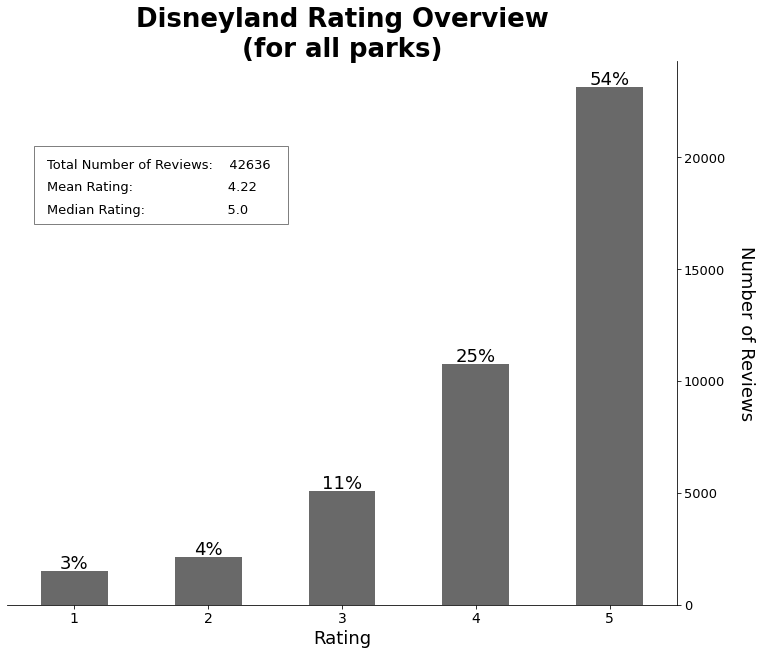

In [28]:
# barplot

ax = data['Rating'].value_counts().sort_index(ascending=True).plot.bar(figsize=(12,10), 
                                        fontsize=14,
                                        rot=0,
                                        color = 'dimgrey')

# Put percentages above bars
for bar in ax.patches:
    num = str(((bar.get_height()/42636)*100).astype(int))+'%'
    ax.text(bar.get_x()+0.25, bar.get_height()+100, num, 
            horizontalalignment='center',
            fontsize=18)

# Make it look nice
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_ylabel('Number of Reviews', fontsize = 18, rotation = 270, labelpad=30)
plt.yticks(fontsize=13)
plt.xlabel('Rating', fontsize = 18)
ax.text(0.5, 1.1, "Disneyland Rating Overview\n(for all parks)", 
        transform = ax.transAxes, 
        horizontalalignment='center', 
        verticalalignment='top',
        fontsize=26,
        weight='bold')

# Add some stats
ax.text(-0.2, 19500, 'Total Number of Reviews:    42636', fontsize = 13)
ax.text(-0.2, 18500, 'Mean Rating:                       4.22', fontsize = 13)
ax.text(-0.2, 17500, 'Median Rating:                    5.0', fontsize = 13)

rect = patches.Rectangle((-0.3, 17000), 1.9, 3500, linewidth=1, edgecolor='gray', facecolor='none')
ax.add_patch(rect)


plt.savefig('OverallRatings.png', bbox_inches = 'tight')
plt.show()

In [29]:
data['Rating'].describe()

count    42636.000000
mean         4.217680
std          1.063491
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [30]:
# Distribution of ratings by park

rating_cali = data.loc[data['Branch'] == 'Disneyland_California'] 
rating_cali

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019,4
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019,4
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California,2019,5
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019,4
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019,4
...,...,...,...,...,...,...,...,...
29021,1563280,5,NaN,United States,I have taken my music groups to Disneyland for...,Disneyland_California,NaN,NaN
29022,1540854,5,NaN,United States,This is definitely the Happiest Place on Earth...,Disneyland_California,NaN,NaN
29023,1534364,1,NaN,United States,"never again...what a horrible experience, the ...",Disneyland_California,NaN,NaN
29024,1506324,5,NaN,United States,We take a long weekend trip to California each...,Disneyland_California,NaN,NaN


In [31]:
rating_paris = data.loc[data['Branch'] == 'Disneyland_Paris'] 
rating_paris

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
29026,670721950,5,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,2019,3
29027,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris,2018,6
29028,670606796,5,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,2019,4
29029,670586937,4,2019-4,Australia,We didn't realise it was school holidays when ...,Disneyland_Paris,2019,4
29030,670535589,5,NaN,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,NaN,NaN
...,...,...,...,...,...,...,...,...
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,NaN,NaN
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,NaN,NaN
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,NaN,NaN
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,NaN,NaN


In [32]:
rating_hongkong = data.loc[data['Branch'] == 'Disneyland_HongKong'] 
rating_hongkong

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4
...,...,...,...,...,...,...,...,...
9615,4033897,1,NaN,United States,My husband and I took our 2 kids and it was th...,Disneyland_HongKong,NaN,NaN
9616,4020946,2,NaN,United States,The park is small. Tiny small.They say one of ...,Disneyland_HongKong,NaN,NaN
9617,3998899,4,NaN,United Kingdom,Visited Hong Kong Disneyland on the 28th Septe...,Disneyland_HongKong,NaN,NaN
9618,3924467,4,NaN,Philippines,"Visited Hkg Disney Sept 16 ,5 days after it of...",Disneyland_HongKong,NaN,NaN


In [33]:
x1=rating_cali['Rating']
x2=rating_paris['Rating']
x3=rating_hongkong['Rating']

In [34]:
x3.describe()

count    9607.000000
mean        4.204226
std         0.933189
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

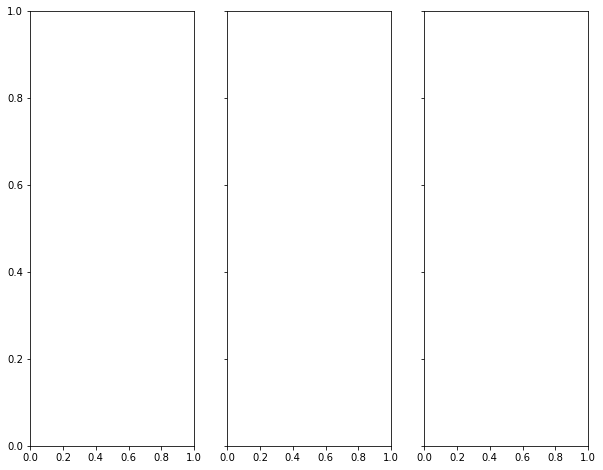

In [35]:
## BOXPLOTS ##

# Found some stylizing options in matplotlib documentation online
boxprops=dict(linestyle='-', linewidth=3, color='black')
whiskerprops=dict(linestyle='-', linewidth=3, color='black')
capprops=dict(linestyle='-', linewidth=3, color='black')
flierprops= dict(marker='o', markerfacecolor='black', markersize=6,
                 linestyle='none')
medianprops=dict(linestyle='-', linewidth=2.5, color='cornflowerblue')
meanprops=dict(marker='D', markeredgecolor='mediumblue', markerfacecolor='mediumblue', markersize=7)

f, (bp_cali, bp_paris, bp_hongkong) = plt.subplots(nrows=1, ncols=3, 
                                        sharex=True, sharey=True, figsize=(10,8))

In [36]:
## Cali
# Compute the quartiles and the mean for each 
q1 = np.quantile(x1, [0.25, 0.5, 0.75])
mu1 = np.mean(x1)
q1 = [*q1, mu1]

# Add a boxplot
bp_cali.boxplot(x1,vert=True,showmeans=True, 
                  widths=0.5,
                  boxprops=boxprops,
                  whiskerprops=whiskerprops,
                  capprops=capprops,
                  flierprops=flierprops,
                  medianprops=medianprops,
                  meanprops=meanprops)

# Label the quartiles
for i in range(len(q1)):
    bp_cali.text(1.35, q1[i], (f"{q1[i]:.2f}"),
                horizontalalignment='center',
                fontsize=12)
    
# Found an easy way to format string so that all labels have same number of decimals (Python 3.6 or later)
# https://stackoverflow.com/questions/15619096/add-zeros-to-a-float-after-the-decimal-point-in-python 
# https://www.python.org/dev/peps/pep-0498/
    
# Adjust tick marks, remove spines (keep left spine)
bp_cali.tick_params(labelbottom=False, axis='x', length=0)
bp_cali.tick_params(labelsize=14)
bp_cali.spines['top'].set_visible(False)
bp_cali.spines['bottom'].set_visible(False)
bp_cali.spines['right'].set_visible(False)
bp_cali.set_yticks((1, 2, 3, 4, 5))


# Label plot
bp_cali.set_xlabel('California',fontsize=16,labelpad=15, weight='bold')
bp_cali.set_ylabel('Rating',fontsize=16, labelpad=15, weight='bold')

Text(3.200000000000003, 0.5, 'Rating')

In [37]:
## Paris
# Compute the quartiles and the mean for each 
q2 = np.quantile(x2, [0.25, 0.5, 0.75])
mu2 = np.mean(x2)
q2 = [*q2]

# Add a boxplot
bp_paris.boxplot(x2,vert=True,showmeans=True, widths=0.5,
                  boxprops=boxprops,
                  whiskerprops=whiskerprops,
                  capprops=capprops,
                  flierprops=flierprops,
                  medianprops=medianprops,
                  meanprops=meanprops)

# Label the quartiles
for i in range(len(q2)):
    bp_paris.text(1.35, q2[i], (f"{q2[i]:.2f}"),
                horizontalalignment='center',
                fontsize=12)
    
bp_paris.text(1.35, mu2-.07, (f"{mu2:.2f}"),
                horizontalalignment='center',
                fontsize=12)

# Adjust tick marks, remove spines
bp_paris.tick_params(labelbottom=False, axis='x', length=0)
bp_paris.tick_params(labelleft=False, axis='y', length=0)
[bp_paris.spines[s].set_visible(False) for s in bp_paris.spines]

# Label plot
bp_paris.set_xlabel('Paris',fontsize=16, labelpad=15, weight='bold')

Text(0.5, 3.200000000000003, 'Paris')

In [38]:
## Hong Kong
# Compute the quartiles and the mean for each 
q3 = np.quantile(x3, [0.25, 0.5, 0.75])
mu3 = np.mean(x3)
q3 = [*q3, mu3]

#for value in q3:
    #q3 = format(value, '.3f')

# Add a boxplot
bp_hongkong.boxplot(x3,vert=True,showmeans=True, widths=0.5,
                 boxprops=boxprops,
                  whiskerprops=whiskerprops,
                  capprops=capprops,
                  flierprops=flierprops,
                  medianprops=medianprops,
                  meanprops=meanprops)

# Label the quartiles
for i in range(len(q3)):
    bp_hongkong.text(1.35, q3[i], (f"{q3[i]:.2f}"),
                horizontalalignment='center',
                fontsize=12)

# Adjust tick marks, remove spines
bp_hongkong.tick_params(labelbottom=False, axis='x', length=0)
bp_hongkong.tick_params(labelleft=False, axis='y', length=0)
[bp_hongkong.spines[s].set_visible(False) for s in bp_hongkong.spines]

# Label plot
bp_hongkong.set_xlabel('Hong Kong',fontsize=16, labelpad=15, weight='bold')

Text(0.5, 3.200000000000003, 'Hong Kong')

In [39]:
f.suptitle('How do TripAdvisor ratings compare\namong Disneyland locations?', fontsize=25, weight='bold', y=1.02)

# Found way on stack overflow to add legend for the markers
# https://stackoverflow.com/questions/47391702/matplotlib-making-a-colored-markers-legend-from-scratch
# Essentially, 

mean_diamond = mlines.Line2D([], [], color='mediumblue', marker='D', linestyle='None',
                          markersize=10, label='Mean')
med_line = mlines.Line2D([], [], color='cornflowerblue', marker='_', linestyle='None',
                          markersize=10, label='Median')

f.legend(handles=[mean_diamond, med_line], loc=(0.87,0.4), fontsize=12)

In [40]:
f.savefig('ParkRatingsBoxplot.png', bbox_inches = 'tight')
f.show()

In [41]:
### PLOT RATING BY MONTH OF VISIT ###

In [42]:
data.shape

(42636, 8)

In [43]:
# Drop reviews that do not have a date
timedata = data.dropna()
timedata.shape

(40023, 8)

In [44]:
# Make Year and Month integers
timedata.dtypes
timedata['Year'] = timedata['Year'].astype('int')
timedata['Month'] = timedata['Month'].astype('int')

timedata.dtypes

<ipython-input-44-82ee0e8b9fd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timedata['Year'] = timedata['Year'].astype('int')
<ipython-input-44-82ee0e8b9fd7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timedata['Month'] = timedata['Month'].astype('int')


Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
Year                  int64
Month                 int64
dtype: object

In [45]:
# Categorize ratings into 5/4 (high) and 1/2/3 (med/low)
temp = timedata['Rating'] >= 4
temp[temp==True] = 'High'
temp[temp==False] = 'Med/Low'

timedata['Rating_split'] = temp
del temp
timedata.head()

<ipython-input-45-097bb40faae7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timedata['Rating_split'] = temp


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,Rating_split
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,High
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,High
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,High
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,High
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,High


In [46]:
# Split up by park
cali_timedata = timedata[timedata['Branch'] == 'Disneyland_California']
paris_timedata = timedata[timedata['Branch'] == 'Disneyland_Paris']
hk_timedata = timedata[timedata['Branch'] == 'Disneyland_HongKong']

In [47]:
# Create crosstabs for plotting high & low/med ratings
cali_month_rating = pd.crosstab(cali_timedata['Month'], cali_timedata['Rating_split'])

# Re-order crosstab so that plot has lower ratings on bottom of stack
order = ['Med/Low', 'High']
cali_month_rating = cali_month_rating[order]
cali_month_rating

Rating_split,Med/Low,High
Month,,
1,183,1006
2,188,919
3,241,1210
4,216,1266
5,245,1321
6,236,1410
7,263,1575
8,210,1478
9,180,1422


In [48]:
paris_month_rating = pd.crosstab(paris_timedata['Month'], paris_timedata['Rating_split'])
order = ['Med/Low', 'High']
paris_month_rating = paris_month_rating[order]

In [49]:
hk_month_rating = pd.crosstab(hk_timedata['Month'], hk_timedata['Rating_split'])
order = ['Med/Low', 'High']
hk_month_rating = hk_month_rating[order]

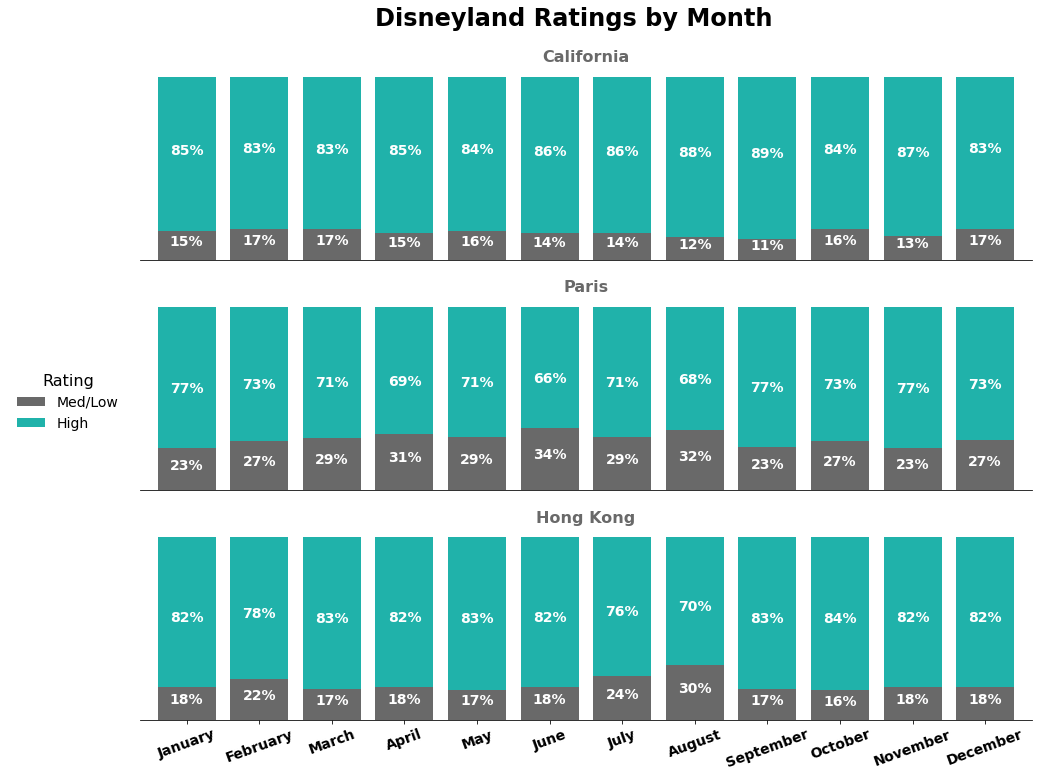

In [73]:
## Plot rating (high vs low/med) by month and park

#######
# Cali
#######
ax_cali = plt.subplot(3, 1, (1, 1))

df_pct = cali_month_rating.apply(lambda r: r/r.sum(),axis=1)
df_pct

n_per_bar = cali_month_rating.sum(axis=1)

df_pct.plot.bar(
        figsize=(16,12), 
        fontsize=18, 
        stacked=True,
        rot = 0,
        width = 0.8,
        color = ['dimgrey','lightseagreen'],
        ax = ax_cali)
    
# Label the percentages within the bars
for i in[0,1,2,3,4,5,6,7,8,9,10,11]:
    for j in [0]:
        plt.text(i, abs(j-df_pct.iloc[i,j]/2), 
                     str(round(df_pct.iloc[i,j]*100)) + '%',
                     horizontalalignment='center',
                     fontsize=14,
                     color='white',
                     weight='bold')
    for j in [1]:
        plt.text(i, abs(j-df_pct.iloc[i,j]/2), 
                     str(round(df_pct.iloc[i,j]*100)) + '%',
                     horizontalalignment='center',
                     fontsize=14,
                     color='white',
                     weight='bold')
        
# Turn off the spines
ax_cali.spines['top'].set_visible(False)
ax_cali.spines['left'].set_visible(False)
ax_cali.spines['right'].set_visible(False)
# Remove the y-axis
ax_cali.get_yaxis().set_visible(False)
# Remove the x-ticks
ax_cali.tick_params(axis='x', length=0)

ax_cali.set_xlabel('')
ax_cali.set_xticklabels('')

    
########
# Paris
########
ax_paris = plt.subplot(3, 1, (2, 2))

df_pct = paris_month_rating.apply(lambda r: r/r.sum(),axis=1)
df_pct

n_per_bar = paris_month_rating.sum(axis=1)

df_pct.plot.bar(
        figsize=(16,12), 
        fontsize=18, 
        stacked=True,
        rot = 0,
        width = 0.8,
        color = ['dimgrey','lightseagreen'],
        ax = ax_paris)

# Label the percentages within the bars
for i in[0,1,2,3,4,5,6,7,8,9,10,11]:
    for j in [0]:
        plt.text(i, abs(j-df_pct.iloc[i,j]/2), 
                     str(round(df_pct.iloc[i,j]*100)) + '%',
                     horizontalalignment='center',
                     fontsize=14,
                     color='white',
                     weight='bold')
    for j in [1]:
        plt.text(i, abs(j-df_pct.iloc[i,j]/2)-0.08, 
                     str(round(df_pct.iloc[i,j]*100)) + '%',
                     horizontalalignment='center',
                     fontsize=14,
                     color='white',
                     weight='bold')
        
# Turn off the spines
ax_paris.spines['top'].set_visible(False)
ax_paris.spines['left'].set_visible(False)
ax_paris.spines['right'].set_visible(False)
# Remove the y-axis
ax_paris.get_yaxis().set_visible(False)
# Remove the x-ticks
ax_paris.tick_params(axis='x', length=0)

ax_paris.set_xlabel('')
ax_paris.set_xticklabels('')

###########
#Hong Kong
###########
ax_hk = plt.subplot(3, 1, (3, 3))

df_pct = hk_month_rating.apply(lambda r: r/r.sum(),axis=1)
df_pct

n_per_bar = hk_month_rating.sum(axis=1)

df_pct.plot.bar(
        figsize=(16,12), 
        fontsize=18, 
        stacked=True,
        rot = 0,
        width = 0.8,
        color = ['dimgrey','lightseagreen'],
        ax = ax_hk)

# Label the percentages within the bars
for i in[0,1,2,3,4,5,6,7,8,9,10,11]:
    for j in [0]:
        plt.text(i, abs(j-df_pct.iloc[i,j]/2), 
                     str(round(df_pct.iloc[i,j]*100)) + '%',
                     horizontalalignment='center',
                     fontsize=14,
                     color='white',
                     weight='bold')
    for j in [1]:
        plt.text(i, abs(j-df_pct.iloc[i,j]/2-0.05), 
                     str(round(df_pct.iloc[i,j]*100)) + '%',
                     horizontalalignment='center',
                     fontsize=14,
                     color='white',
                     weight='bold')
        
# Turn off the spines
ax_hk.spines['top'].set_visible(False)
ax_hk.spines['left'].set_visible(False)
ax_hk.spines['right'].set_visible(False)
# Remove the y-axis
ax_hk.get_yaxis().set_visible(False)
# Remove the x-ticks
#ax_paris.tick_params(axis='x', length=0)

ax_hk.set_xticklabels(['January','February','March','April','May','June',
                        'July', 'August','September','October','November','December'], 
                       fontsize=14, weight='bold', rotation=20)

ax_hk.set_xlabel('')


# Add location titles
ax_cali.set_title('California', fontsize=16, color='dimgrey', weight='bold')
ax_paris.set_title('Paris', fontsize=16, color='dimgrey', weight='bold')
ax_hk.set_title('Hong Kong', fontsize=16, color='dimgrey', weight='bold')

# Legend
ax_cali.get_legend().remove()
ax_paris.get_legend().remove()
ax_hk.get_legend().remove()

legend = plt.legend(fontsize=14,
        bbox_to_anchor = (-0.06, 0.6),
        bbox_transform = ax.transAxes,
        loc = 'upper center',
        frameon=False,
        markerfirst=True,
        title='Rating')

legend.get_title().set_fontsize('16')

# Title
plt.text(2.6, 3.8, 'Disneyland Ratings by Month', fontsize=24, weight='bold')

plt.savefig('RatingbyMonth.png', bbox_inches = 'tight')
plt.show()

In [60]:
### WORD CLOUDS ###

# Word clouds for top reviews vs average/low reviews (4,5 vs 1,2,3)
    # this will require more processing of data (Review_Text)

In [61]:
def make_wordcloud(input_text, output_file, stopwords=[], 
                   bg='black', colormap='YlGnBu', input_title='',
                   mask=None, contour_width=0, contour_color='black',
                   max_words=200):
    
    text = input_text
    
    wc = WordCloud(colormap=colormap,
                   background_color=bg,
                   stopwords=stopwords,
                   mask=mask,
                   contour_width=contour_width,
                   contour_color=contour_color,
                   max_words=max_words).generate(text)
    
    plt.figure(figsize=(12,12))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(input_title, fontsize=22, weight='bold', pad=20)
    plt.savefig(output_file, bbox_inches='tight')
    return wc

In [62]:
## TOP REVIEWS

top_reviews = data[data['Rating'] >= 4]
top_reviews.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [63]:
# Pull all review text from Review_Text column

top_review_text = ' '.join(top_reviews['Review_Text'])

In [64]:
## MED/LOW REVIEWS

low_reviews = data[data['Rating'] < 4]
low_reviews.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong,2019,4
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong,2019,3
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong,2019,4
15,670205135,3,2019-1,United Kingdom,We brought tickets before we left and got 2 da...,Disneyland_HongKong,2019,1
17,670129921,3,2019-4,United Kingdom,Around 60 per person and if you want to eat ...,Disneyland_HongKong,2019,4


In [65]:
# Pull all review text from Review_Text column

low_review_text = ' '.join(low_reviews['Review_Text'])

In [66]:
# Establish stop words

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['park','ride', 'rides','get','Disney', 'Disneyland', 'one', 'day', 'time', 'go', 'went', 'also', 'would', 'lot']
stopwords.extend(newStopWords)

# https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist

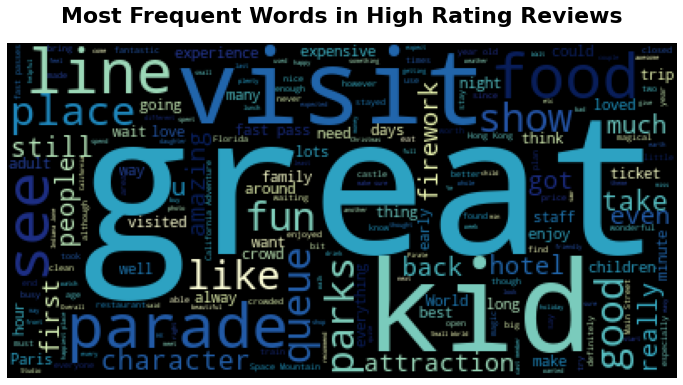

In [67]:
make_wordcloud(top_review_text, 'Top_Reviews_WC.png',
                  stopwords=stopwords, input_title='Most Frequent Words in High Rating Reviews')

plt.show()

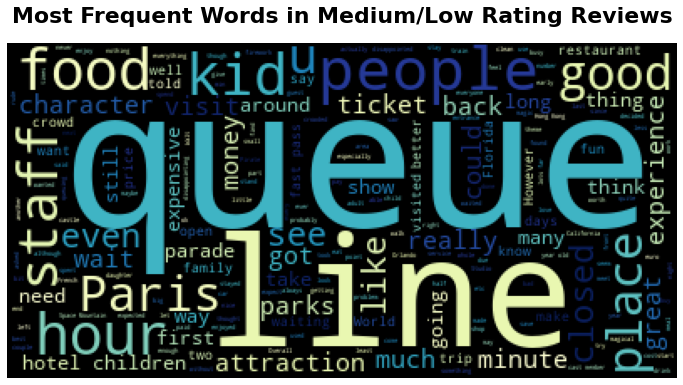

In [79]:
make_wordcloud(low_review_text, 'Low_Reviews_WC.png',
                      stopwords=stopwords, input_title='Most Frequent Words in Medium/Low Rating Reviews')
plt.show()